In the last notebook we analyzed the oil production data from Alberta in 2024 and determined the top 5 companies. In this notebook we will evaluate the top producing wells of those companies, to evaluate if there's any undesired product

In [10]:
#Importing libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import requests
import io
import zipfile


In [11]:
def download_data(url):
  # Step 1: Download the .zip file
  response = requests.get(url)
  if response.status_code == 200:
      print("Download successful!")
  else:
      print(f"Failed to download file. Status code: {response.status_code}")

  # Step 2: Extract the outer .zip file in memory
  with zipfile.ZipFile(io.BytesIO(response.content)) as outer_zip:
    # List the files in the outer .zip file
      outer_files = outer_zip.namelist()
      print(f"Files in the outer zip: {outer_files}")

    # Assuming the inner .zip file is the first file
      inner_zip_name = outer_files[0]

    # Step 3: Extract the inner .zip file
      with outer_zip.open(inner_zip_name) as inner_zip_file:
          with zipfile.ZipFile(io.BytesIO(inner_zip_file.read())) as inner_zip:
            # List the files in the inner .zip file
              inner_files = inner_zip.namelist()
              print(f"Files in the inner zip: {inner_files}")

            # Assuming the .csv file is the first file in the inner .zip
              csv_file_name = inner_files[0]

            # Step 4: Load the .csv file into a pandas DataFrame
              with inner_zip.open(csv_file_name) as csv_file:
                  data = pd.read_csv(csv_file)

              return data


In [12]:
# Importing data from first 4 months of 2024

url_Jan = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-01/CSV"
url_Feb = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-02/CSV"
url_Mar = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-03/CSV"
url_Apr = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-04/CSV"
url_May = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-05/CSV"
url_Jun = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-06/CSV"
url_Jul = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-07/CSV"
url_Aug = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-08/CSV"
url_Sep = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-09/CSV"
url_Oct = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-10/CSV"
url_Nov = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-11/CSV"
url_Dec = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-12/CSV"


data_Jan=download_data(url_Jan)
data_Feb=download_data(url_Feb)
data_Mar=download_data(url_Mar)
data_Apr=download_data(url_Apr)
data_May=download_data(url_May)
data_Jun=download_data(url_Jun)
data_Jul=download_data(url_Jul)
data_Aug=download_data(url_Aug)
data_Sep=download_data(url_Sep)
data_Oct=download_data(url_Oct)
data_Nov=download_data(url_Nov)
#data_Dec=download_data(url_Dec)

Download successful!
Files in the outer zip: ['Vol_2024-01-AB.csv.zip']
Files in the inner zip: ['Vol_2024-01-AB.CSV']


C:\Users\cepg0\AppData\Local\Temp\ipykernel_23636\297834418.py:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-02-AB.csv.zip']
Files in the inner zip: ['Vol_2024-02-AB.CSV']


C:\Users\cepg0\AppData\Local\Temp\ipykernel_23636\297834418.py:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-03-AB.csv.zip']
Files in the inner zip: ['Vol_2024-03-AB.CSV']


C:\Users\cepg0\AppData\Local\Temp\ipykernel_23636\297834418.py:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-04-AB.csv.zip']
Files in the inner zip: ['Vol_2024-04-AB.CSV']


C:\Users\cepg0\AppData\Local\Temp\ipykernel_23636\297834418.py:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-05-AB.csv.zip']
Files in the inner zip: ['Vol_2024-05-AB.CSV']


C:\Users\cepg0\AppData\Local\Temp\ipykernel_23636\297834418.py:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-06-AB.csv.zip']
Files in the inner zip: ['Vol_2024-06-AB.CSV']


C:\Users\cepg0\AppData\Local\Temp\ipykernel_23636\297834418.py:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-07-AB.csv.zip']
Files in the inner zip: ['Vol_2024-07-AB.CSV']


C:\Users\cepg0\AppData\Local\Temp\ipykernel_23636\297834418.py:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-08-AB.csv.zip']
Files in the inner zip: ['Vol_2024-08-AB.CSV']


C:\Users\cepg0\AppData\Local\Temp\ipykernel_23636\297834418.py:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-09-AB.csv.zip']
Files in the inner zip: ['Vol_2024-09-AB.CSV']


C:\Users\cepg0\AppData\Local\Temp\ipykernel_23636\297834418.py:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-10-AB.csv.zip']
Files in the inner zip: ['Vol_2024-10-AB.CSV']


C:\Users\cepg0\AppData\Local\Temp\ipykernel_23636\297834418.py:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-11-AB.csv.zip']
Files in the inner zip: ['Vol_2024-11-AB.CSV']


C:\Users\cepg0\AppData\Local\Temp\ipykernel_23636\297834418.py:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


In [13]:
combined_ALL_df=pd.concat([data_Jan, data_Feb,data_Mar,data_Apr,data_May,data_Jun,data_Jul,data_Aug,data_Sep,data_Oct,data_Nov], ignore_index=True)
print(combined_ALL_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6087613 entries, 0 to 6087612
Data columns (total 30 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   ProductionMonth                 object 
 1   OperatorBAID                    object 
 2   OperatorName                    object 
 3   ReportingFacilityID             object 
 4   ReportingFacilityProvinceState  object 
 5   ReportingFacilityType           object 
 6   ReportingFacilityIdentifier     int64  
 7   ReportingFacilityName           object 
 8   ReportingFacilitySubType        int64  
 9   ReportingFacilitySubTypeDesc    object 
 10  ReportingFacilityLocation       object 
 11  FacilityLegalSubdivision        int64  
 12  FacilitySection                 int64  
 13  FacilityTownship                int64  
 14  FacilityRange                   int64  
 15  FacilityMeridian                int64  
 16  SubmissionDate                  object 
 17  ActivityID                 

Let's start with Cenovus, which was the top 1 company

In [15]:
Cenovus_all_df=combined_ALL_df[(combined_ALL_df['OperatorName']=='CENOVUS ENERGY INC.')]
Cenovus_all_df=Cenovus_all_df.dropna(axis=1,how='all')
Cenovus_all_df=Cenovus_all_df.drop('OperatorName',axis=1)
print(Cenovus_all_df.info())

Cenovus_all_df['ProductionMonth']=pd.to_datetime(Cenovus_all_df['ProductionMonth'])
Cenovus_all_df['SubmissionDate']=pd.to_datetime(Cenovus_all_df['SubmissionDate'])



<class 'pandas.core.frame.DataFrame'>
Index: 254520 entries, 331356 to 5869717
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ProductionMonth                 254520 non-null  object 
 1   OperatorBAID                    254520 non-null  object 
 2   ReportingFacilityID             254520 non-null  object 
 3   ReportingFacilityProvinceState  254520 non-null  object 
 4   ReportingFacilityType           254520 non-null  object 
 5   ReportingFacilityIdentifier     254520 non-null  int64  
 6   ReportingFacilityName           254520 non-null  object 
 7   ReportingFacilitySubType        254520 non-null  int64  
 8   ReportingFacilitySubTypeDesc    254520 non-null  object 
 9   ReportingFacilityLocation       254520 non-null  object 
 10  FacilityLegalSubdivision        254520 non-null  int64  
 11  FacilitySection                 254520 non-null  int64  
 12  FacilityTownshi

In [16]:
Cenovus_all_df = Cenovus_all_df.dropna(subset=['Volume'])
Cenovus_all_df['Volume'] = pd.to_numeric(Cenovus_all_df['Volume'], errors='coerce')
Cenovus_all_df['Volume']=Cenovus_all_df['Volume'].astype(float)
Cenovus_all_df['Volume']=Cenovus_all_df['Volume']*6.28981
print(Cenovus_all_df['Volume'].describe())
print(Cenovus_all_df.info())
#removing negative values
Cenovus_all_df = Cenovus_all_df[Cenovus_all_df['Volume'] >= 0]

count    2.372340e+05
mean     1.054438e+04
std      1.921735e+05
min     -3.314730e+05
25%      5.031848e+00
50%      1.069268e+02
75%      9.308919e+02
max      1.782520e+07
Name: Volume, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 237234 entries, 331356 to 5869717
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ProductionMonth                 237234 non-null  datetime64[ns]
 1   OperatorBAID                    237234 non-null  object        
 2   ReportingFacilityID             237234 non-null  object        
 3   ReportingFacilityProvinceState  237234 non-null  object        
 4   ReportingFacilityType           237234 non-null  object        
 5   ReportingFacilityIdentifier     237234 non-null  int64         
 6   ReportingFacilityName           237234 non-null  object        
 7   ReportingFacilitySubType        237234 non-null  int64   

In [17]:
top_10_Cenovus = Cenovus_all_df[(Cenovus_all_df['ProductID']=='OIL')&(Cenovus_all_df['ActivityID']=='PROD')]
top_10_Cenovus = top_10_Cenovus.groupby(['FromToID'])['Volume'].sum()
top_10_Cenovus = top_10_Cenovus.sort_values(ascending=False)
top_10_Cenovus = top_10_Cenovus.head(10)
print(top_10_Cenovus)

FromToID
ABWI108121207006W400    1.216893e+06
ABWI106131207006W400    1.073683e+06
ABWI107131207006W402    1.029405e+06
ABWI108131207006W400    9.790655e+05
ABWI135150207606W400    8.982585e+05
ABWI102042107005W400    8.486306e+05
ABWI104052107005W400    8.149984e+05
ABWI107032107005W400    8.115729e+05
ABWI1W0043307004W400    8.092721e+05
ABWI1W2043307004W400    8.052240e+05
Name: Volume, dtype: float64


We have now the top 10 wells for Cenovus identified. Let's now evaluate their biproducts and activity

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 334129 to 5849013
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ProductionMonth                 43 non-null     datetime64[ns]
 1   OperatorBAID                    43 non-null     object        
 2   ReportingFacilityID             43 non-null     object        
 3   ReportingFacilityProvinceState  43 non-null     object        
 4   ReportingFacilityType           43 non-null     object        
 5   ReportingFacilityIdentifier     43 non-null     int64         
 6   ReportingFacilityName           43 non-null     object        
 7   ReportingFacilitySubType        43 non-null     int64         
 8   ReportingFacilitySubTypeDesc    43 non-null     object        
 9   ReportingFacilityLocation       43 non-null     object        
 10  FacilityLegalSubdivision        43 non-null     int64         
 11  Fac

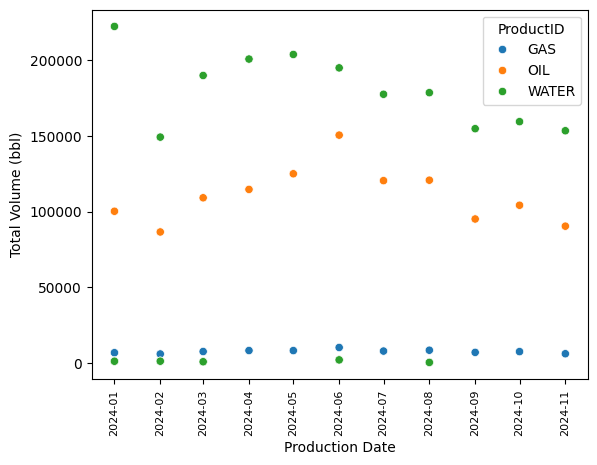

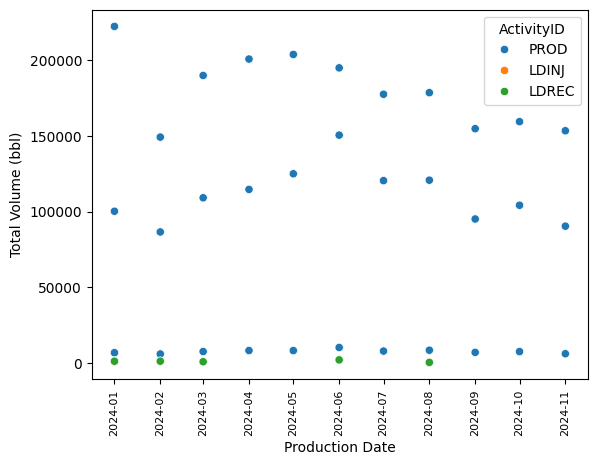

In [18]:
Cenovus_top1=Cenovus_all_df[Cenovus_all_df['FromToID']=='ABWI108121207006W400']
print(Cenovus_top1.info())
sns.scatterplot(data=Cenovus_top1,x='ProductionMonth',y='Volume',hue='ProductID')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Total Volume (bbl)')
plt.xlabel('Production Date')
plt.show()

sns.scatterplot(data=Cenovus_top1,x='ProductionMonth',y='Volume',hue='ActivityID')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Total Volume (bbl)')
plt.xlabel('Production Date')
plt.show()

Looks like there was only Water, Oil and Gas as products from Cenovus Top well. The gas amount can be neglebible, however the amount of water is concerning, since it's an undesired product.

On the other hand, there's 2 other items, which are LOAD FLUID INJECTED (LDINJ) and LOAD FLUID RECOVERED (LDREC). Let's analyze the amount of load fluid recovery ratio and the oil/water ratio for these top 10 wells

In [19]:
Cenovus_top1_water=Cenovus_top1[(Cenovus_top1['ProductID']=='WATER')]
Cenovus_top1_water=Cenovus_top1_water.groupby(['ProductionMonth'],as_index=True).agg({
    'Volume': 'sum'
}).reset_index()
Cenovus_top1_oil=Cenovus_top1[(Cenovus_top1['ProductID']=='OIL')]
Cenovus_top1_oil=Cenovus_top1_oil.groupby(['ProductionMonth'],as_index=True).agg({
    'Volume': 'sum'
}).reset_index()
Cenovus_watercut_1 = pd.merge(Cenovus_top1_oil, Cenovus_top1_water, on='ProductionMonth', suffixes=('_oil', '_water'))
Cenovus_watercut_1['Water_Cut (%)'] = (Cenovus_watercut_1['Volume_water'] /
                               (Cenovus_watercut_1['Volume_oil'] + Cenovus_watercut_1['Volume_water'])) * 100
avg_1_WC = Cenovus_watercut_1['Water_Cut (%)'].mean()
print(avg_1_WC)
print(Cenovus_watercut_1)

62.15509616723088
   ProductionMonth     Volume_oil   Volume_water  Water_Cut (%)
0       2024-01-01  100202.334129  224458.159660      69.136271
1       2024-02-01   86503.756930  151310.185284      63.625448
2       2024-03-01  109117.510823  191341.052048      63.683008
3       2024-04-01  114656.317509  200897.160381      63.665012
4       2024-05-01  125005.570883  203935.767592      61.997610
5       2024-06-01  150579.309362  198813.975309      56.902632
6       2024-07-01  120459.925196  177596.559236      59.584867
7       2024-08-01  120759.320152  179064.600890      59.723254
8       2024-09-01   95086.202675  154836.881751      61.953814
9       2024-10-01  104182.525897  159486.938284      60.487451
10      2024-11-01   90339.912049  153470.735019      62.946691


In [20]:
Cenovus_top1_LDINJ=Cenovus_top1[(Cenovus_top1['ActivityID']=='LDINJ')]
Cenovus_top1_LDINJ=Cenovus_top1_LDINJ.groupby(['ProductionMonth'],as_index=True).agg({
    'Volume': 'sum'
}).reset_index()
Cenovus_top1_LDREC=Cenovus_top1[(Cenovus_top1['ActivityID']=='LDREC')]
Cenovus_top1_LDREC=Cenovus_top1_LDREC.groupby(['ProductionMonth'],as_index=True).agg({
    'Volume': 'sum'
}).reset_index()
Cenovus_LD = pd.merge(Cenovus_top1_LDINJ, Cenovus_top1_LDREC, on='ProductionMonth', suffixes=('_INJ', '_REC'))
print(Cenovus_LD.info())
Cenovus_LD['LD recovery (%)'] = (Cenovus_LD['Volume_REC'] /
                               (Cenovus_LD['Volume_INJ'] )) * 100

print(Cenovus_LD)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ProductionMonth  5 non-null      datetime64[ns]
 1   Volume_INJ       5 non-null      float64       
 2   Volume_REC       5 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 252.0 bytes
None
  ProductionMonth   Volume_INJ   Volume_REC  LD recovery (%)
0      2024-01-01   987.500170   987.500170            100.0
1      2024-02-01  1025.239030  1025.239030            100.0
2      2024-03-01   657.285145   657.285145            100.0
3      2024-06-01  1874.363380  1874.363380            100.0
4      2024-08-01   201.273920   201.273920            100.0


The Load fluid recovery rate was 100% every time for that well, which is a good sign for well mantainence.

As for the water cut % value, it seemed a little high for this well. let's do the same estimate for the rest of the top 10 wells and get a total

In [21]:
def well_prods_act(DF,wellID):
  topX=DF[DF['FromToID']==wellID]
  print(topX['ActivityID'].unique())
  print(topX['ProductID'].unique())

In [22]:
def Water_cut(DF,wellID):
  topX=DF[DF['FromToID']==wellID]
  topX_water=topX[(topX['ProductID']=='WATER')]
  topX_water=topX_water.groupby(['ProductionMonth'],as_index=True).agg({
      'Volume': 'sum'
  }).reset_index()
  topX_oil=topX[(topX['ProductID']=='OIL')]
  topX_oil=topX_oil.groupby(['ProductionMonth'],as_index=True).agg({
      'Volume': 'sum'
  }).reset_index()
  Watercut = pd.merge(topX_oil, topX_water, on='ProductionMonth', suffixes=('_oil', '_water'))
  Watercut['Water_Cut (%)'] = (Watercut['Volume_water'] /
                               (Watercut['Volume_oil'] + Watercut['Volume_water'])) * 100
  avg_WC = Watercut['Water_Cut (%)'].mean()
  Watercut['wellID']=wellID
  Watercut=Watercut.drop(['Volume_water','Volume_oil'],axis=1)

  return (Watercut,avg_WC)

In [23]:
def Load_Fluid(DF,wellID):
  topX=DF[DF['FromToID']==wellID]
  topX_LDINJ=topX[(topX['ActivityID']=='LDINJ')]
  topX_LDINJ=topX_LDINJ.groupby(['ProductionMonth'],as_index=True).agg({
     'Volume': 'sum'
  }).reset_index()
  topX_LDREC=topX[(topX['ActivityID']=='LDREC')]
  topX_LDREC=topX_LDREC.groupby(['ProductionMonth'],as_index=True).agg({
      'Volume': 'sum'
  }).reset_index()
  LD = pd.merge(topX_LDINJ, topX_LDREC, on='ProductionMonth', suffixes=('_INJ', '_REC'))
  LD['LD recovery (%)'] = (LD['Volume_REC'] /
                               (LD['Volume_INJ'] )) * 100
  avg_LD = LD['LD recovery (%)'].mean()
  return (LD,avg_LD)

In [24]:
for well in top_10_Cenovus.index:
  well_prods_act(Cenovus_all_df,well)

['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']


In [25]:
Cenovovus_watercut=[]
for well in top_10_Cenovus.index:
  Cenovovus_watercut.append(Water_cut(Cenovus_all_df,well)[1])

print(Cenovovus_watercut)

[62.15509616723088, 69.30334983599077, 60.41954633510449, 68.69803805636387, 65.93497864791856, 67.77154467517671, 69.75889474307756, 66.12177113692837, 69.3416159512616, 68.40707386571981]


In [26]:
Cenovovus_LD=[]
for well in top_10_Cenovus.index:
  Cenovovus_LD.append(Load_Fluid(Cenovus_all_df,well)[1])

print(Cenovovus_LD)

[100.0, 100.0, nan, 100.0, nan, 100.0, 100.0, nan, 100.0, 100.0]


Overall it seems like the water cut content is over 65%. This is a very high value, which translates into a high cost of treatment upstream.

In terms of load fluid recovery, it seems to be 100% except when there isn't any.

As per the previous discovery, it's worth to do the comparison for the other top 5 companies

In [29]:
#Grab only CNRL wells
CNRL_all_df=combined_ALL_df[(combined_ALL_df['OperatorName']=='CANADIAN NATURAL RESOURCES LIMITED.')]
#CNRL_all_df=CNRL_all_df.dropna(axis=1,how='all')
CNRL_all_df=CNRL_all_df.drop('OperatorName',axis=1)
#Clean and fix data
CNRL_all_df['ProductionMonth']=pd.to_datetime(CNRL_all_df['ProductionMonth'])
CNRL_all_df['SubmissionDate']=pd.to_datetime(CNRL_all_df['SubmissionDate'])
CNRL_all_df = CNRL_all_df.dropna(subset=['Volume'])
CNRL_all_df['Volume'] = pd.to_numeric(CNRL_all_df['Volume'], errors='coerce')
CNRL_all_df['Volume']=CNRL_all_df['Volume'].astype(float)
CNRL_all_df['Volume']=CNRL_all_df['Volume']*6.28981
print(CNRL_all_df['Volume'].describe())
print(CNRL_all_df.info())
#removing negative values
CNRL_all_df = CNRL_all_df[CNRL_all_df['Volume'] >= 0]

#Locate top 10 wells
top_10_CNRL = CNRL_all_df[(CNRL_all_df['ProductID']=='OIL')&(CNRL_all_df['ActivityID']=='PROD')]
top_10_CNRL = top_10_CNRL.groupby(['FromToID'])['Volume'].sum()
top_10_CNRL = top_10_CNRL.sort_values(ascending=False)
top_10_CNRL = top_10_CNRL.head(10)
print(top_10_CNRL)

MemoryError: Unable to allocate 48.9 MiB for an array with shape (6, 1068843) and data type object

In [30]:
for well in top_10_CNRL.index:
  well_prods_act(CNRL_all_df,well)

NameError: name 'top_10_CNRL' is not defined

In [ ]:
for well in top_10_CNRL.index:
  well_prods_act(CNRL_all_df,well)

NameError: name 'top_10_CNRL' is not defined

In [20]:
CNRL_watercut=[]
for well in top_10_CNRL.index:
  CNRL_watercut.append(Water_cut(CNRL_all_df,well)[1])

print(CNRL_watercut)

[67.42052270582707, 68.50821693525006, 66.4203171063965, 69.39626982286933, 70.01195645649324, 73.2466170329131, 67.51610628763524, 66.22696158355244, 62.1888053479928, 64.07407381079987]


The Water cut content for CNRL seems to be the same as Cenovus. The main difference is that there's Steam content now. Lets explore the highest

Another find to point out is that there's data of load fluid injection but not recovery. That means there's additional costs for this company

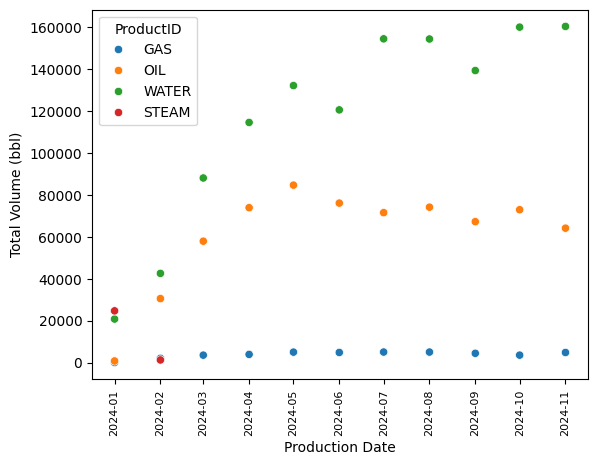

In [21]:
CNRL_top1=CNRL_all_df[CNRL_all_df['FromToID']=='ABWI105063607508W400']
sns.scatterplot(data=CNRL_top1,x='ProductionMonth',y='Volume',hue='ProductID')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Total Volume (bbl)')
plt.xlabel('Production Date')
plt.show()

The only moment that it seems to matter is during the first month. Since the steam content is very high it might indicate some inneficiencies. We would need to check it's performance in 2023. It seemed to have been fixed in the latter months

Suncor

In [22]:
#Grab only SUNCOR wells
SUNCOR_all_df=combined_ALL_df[(combined_ALL_df['OperatorName']=='SUNCOR ENERGY INC.')]
SUNCOR_all_df=SUNCOR_all_df.dropna(axis=1,how='all')
SUNCOR_all_df=SUNCOR_all_df.drop('OperatorName',axis=1)
#Clean and fix data
SUNCOR_all_df['ProductionMonth']=pd.to_datetime(SUNCOR_all_df['ProductionMonth'])
SUNCOR_all_df['SubmissionDate']=pd.to_datetime(SUNCOR_all_df['SubmissionDate'])
SUNCOR_all_df = SUNCOR_all_df.dropna(subset=['Volume'])
SUNCOR_all_df['Volume'] = pd.to_numeric(SUNCOR_all_df['Volume'], errors='coerce')
SUNCOR_all_df['Volume']=SUNCOR_all_df['Volume'].astype(float)
SUNCOR_all_df['Volume']=SUNCOR_all_df['Volume']*6.28981
print(SUNCOR_all_df['Volume'].describe())
print(SUNCOR_all_df.info())
#removing negative values
SUNCOR_all_df = SUNCOR_all_df[SUNCOR_all_df['Volume'] >= 0]

#Locate top 10 wells
top_10_SUNCOR = SUNCOR_all_df[(SUNCOR_all_df['ProductID']=='OIL')&(SUNCOR_all_df['ActivityID']=='PROD')]
top_10_SUNCOR = top_10_SUNCOR.groupby(['FromToID'])['Volume'].sum()
top_10_SUNCOR = top_10_SUNCOR.sort_values(ascending=False)
top_10_SUNCOR = top_10_SUNCOR.head(10)
print(top_10_SUNCOR)

count    2.621700e+04
mean     5.462027e+04
std      6.236563e+05
min     -2.101485e+06
25%      2.138535e+02
50%      9.036570e+03
75%      3.711177e+04
max      2.168592e+07
Name: Volume, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 26217 entries, 13892 to 5541694
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ProductionMonth                 26217 non-null  datetime64[ns]
 1   OperatorBAID                    26217 non-null  object        
 2   ReportingFacilityID             26217 non-null  object        
 3   ReportingFacilityProvinceState  26217 non-null  object        
 4   ReportingFacilityType           26217 non-null  object        
 5   ReportingFacilityIdentifier     26217 non-null  int64         
 6   ReportingFacilityName           26217 non-null  object        
 7   ReportingFacilitySubType        26217 non-null  int64         
 8   

In [23]:
for well in top_10_SUNCOR.index:
  well_prods_act(SUNCOR_all_df,well)

['PROD']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDINVCL' 'LDINVOP' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']


In [24]:
SUNCOR_watercut=[]
for well in top_10_SUNCOR.index:
  SUNCOR_watercut.append(Water_cut(SUNCOR_all_df,well)[1])

print(CNRL_watercut)

[67.42052270582707, 68.50821693525006, 66.4203171063965, 69.39626982286933, 70.01195645649324, 73.2466170329131, 67.51610628763524, 66.22696158355244, 62.1888053479928, 64.07407381079987]


In [25]:
SUNCOR_LD=[]
for well in top_10_Cenovus.index:
  SUNCOR_LD.append(Load_Fluid(SUNCOR_all_df,well)[1])

print(SUNCOR_LD)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


The top 10 wells from SUNCOR seem to be more efficient with a water cut value of 55% average.

Suncor also seems to be efficient in Load fluid recovery unlike CNRL

Imperial Oil

In [26]:
#Grab only CNRL wells
IORL_all_df=combined_ALL_df[(combined_ALL_df['OperatorName']=='IMPERIAL OIL RESOURCES LIMITED')]
IORL_all_df=IORL_all_df.dropna(axis=1,how='all')
IORL_all_df=IORL_all_df.drop('OperatorName',axis=1)
#Clean and fix data
IORL_all_df['ProductionMonth']=pd.to_datetime(IORL_all_df['ProductionMonth'])
IORL_all_df['SubmissionDate']=pd.to_datetime(IORL_all_df['SubmissionDate'])
IORL_all_df = IORL_all_df.dropna(subset=['Volume'])
IORL_all_df['Volume'] = pd.to_numeric(IORL_all_df['Volume'], errors='coerce')
IORL_all_df['Volume']=IORL_all_df['Volume'].astype(float)
IORL_all_df['Volume']=IORL_all_df['Volume']*6.28981
print(IORL_all_df['Volume'].describe())
print(IORL_all_df.info())
#removing negative values
IORL_all_df = IORL_all_df[IORL_all_df['Volume'] >= 0]

#Locate top 10 wells
top_10_IORL = IORL_all_df[(IORL_all_df['ProductID']=='OIL')&(IORL_all_df['ActivityID']=='PROD')]
top_10_IORL = top_10_IORL.groupby(['FromToID'])['Volume'].sum()
top_10_IORL = top_10_IORL.sort_values(ascending=False)
top_10_IORL = top_10_IORL.head(10)
print(top_10_IORL)

count    1.104860e+05
mean     1.316452e+04
std      1.707859e+05
min     -4.851054e+05
25%      7.421976e+01
50%      9.088775e+02
75%      3.600759e+03
max      8.165301e+06
Name: Volume, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 110486 entries, 221 to 5535877
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ProductionMonth                 110486 non-null  datetime64[ns]
 1   OperatorBAID                    110486 non-null  object        
 2   ReportingFacilityID             110486 non-null  object        
 3   ReportingFacilityProvinceState  110486 non-null  object        
 4   ReportingFacilityType           110486 non-null  object        
 5   ReportingFacilityIdentifier     110486 non-null  int64         
 6   ReportingFacilityName           110486 non-null  object        
 7   ReportingFacilitySubType        110486 non-null  int64      

In [27]:
for well in top_10_IORL.index:
  well_prods_act(IORL_all_df,well)

['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD' 'LDINJ' 'LDREC']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['WATER' 'GAS' 'OIL']
['PROD']
['GAS' 'OIL' 'WATER']


In [28]:
IORL_watercut=[]
for well in top_10_IORL.index:
  IORL_watercut.append(Water_cut(IORL_all_df,well)[1])

print(IORL_watercut)

IORL_LD=[]
for well in top_10_IORL.index:
  IORL_LD.append(Load_Fluid(IORL_all_df,well)[1])

print(IORL_LD)

[53.77863740429018, 49.90244478280038, 56.2146170207886, 57.95044647895376, 60.70651148845214, 61.32924695156269, 58.28214634772695, 48.8482626374861, 59.679910877537665, 73.23490858843746]
[nan, nan, nan, 100.0, nan, nan, nan, nan, nan, nan]


The Watercut content for Imperial Oil seems to be very low, compared to CNRL and Cenovus. This means that their well efficiency is superior overall.

There's only 1 instance of load fluid injection, which it seems that they recovered 100% of it

Conocophillips

In [29]:
#Grab only CNRL wells
CP_all_df=combined_ALL_df[(combined_ALL_df['OperatorName']=='CONOCOPHILLIPS CANADA RESOURCES CORP.')]
CP_all_df=CP_all_df.dropna(axis=1,how='all')
CP_all_df=CP_all_df.drop('OperatorName',axis=1)
#Clean and fix data
CP_all_df['ProductionMonth']=pd.to_datetime(CP_all_df['ProductionMonth'])
CP_all_df['SubmissionDate']=pd.to_datetime(CP_all_df['SubmissionDate'])
CP_all_df = CP_all_df.dropna(subset=['Volume'])
CP_all_df['Volume'] = pd.to_numeric(CP_all_df['Volume'], errors='coerce')
CP_all_df['Volume']=CP_all_df['Volume'].astype(float)
CP_all_df['Volume']=CP_all_df['Volume']*6.28981
print(CP_all_df['Volume'].describe())
print(CP_all_df.info())
#removing negative values
CP_all_df = CP_all_df[CP_all_df['Volume'] >= 0]

#Locate top 10 wells
top_10_CP = CP_all_df[(CP_all_df['ProductID']=='OIL')&(CP_all_df['ActivityID']=='PROD')]
top_10_CP = top_10_CP.groupby(['FromToID'])['Volume'].sum()
top_10_CP = top_10_CP.sort_values(ascending=False)
top_10_CP = top_10_CP.head(10)
print(top_10_CP)

count      8972.000000
mean      32456.597502
std       36969.864480
min           0.628981
25%         486.045068
50%       20447.543329
75%       50555.291347
max      234292.277595
Name: Volume, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 8972 entries, 357375 to 5870885
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ProductionMonth                 8972 non-null   datetime64[ns]
 1   OperatorBAID                    8972 non-null   object        
 2   ReportingFacilityID             8972 non-null   object        
 3   ReportingFacilityProvinceState  8972 non-null   object        
 4   ReportingFacilityType           8972 non-null   object        
 5   ReportingFacilityIdentifier     8972 non-null   int64         
 6   ReportingFacilityName           8972 non-null   object        
 7   ReportingFacilitySubType        8972 non-null   int64       

In [30]:
for well in top_10_CP.index:
  well_prods_act(CP_all_df,well)

['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']
['PROD']
['GAS' 'OIL' 'WATER']


In [31]:
CP_watercut=[]
for well in top_10_CP.index:
  CP_watercut.append(Water_cut(CP_all_df,well)[1])

print(CP_watercut)

[72.46211024945693, 69.38374066885163, 77.02184735395177, 74.14431789993604, 69.97325902786942, 70.97107394328934, 71.99482371275984, 71.05540504126081, 69.29464138683244, 76.25516085751788]


Conocophilips top wells suggest a very high value of watercut content compared to the other 4 companies. Let's compare them all in a boxplot

In [39]:
Cenovus_watercut_date=pd.DataFrame()
for well in top_10_Cenovus.index:
  new_WC = Water_cut(Cenovus_all_df,well)[0]  # Get the DataFrame from the function
  Cenovus_watercut_date = pd.concat([Cenovus_watercut_date, new_WC], ignore_index=True)  # Append the DataFrame to the list

Cenovus_watercut_date['Operator'] = 'Cenovus'

CNRL_watercut_date=pd.DataFrame()
for well in top_10_CNRL.index:
  new_WC = Water_cut(CNRL_all_df,well)[0]  # Get the DataFrame from the function
  CNRL_watercut_date = pd.concat([CNRL_watercut_date, new_WC], ignore_index=True)  # Append the DataFrame to the list

CNRL_watercut_date['Operator'] = 'Canadian Natural'

SUNCOR_watercut_date=pd.DataFrame()
for well in top_10_SUNCOR.index:
  new_WC = Water_cut(SUNCOR_all_df,well)[0]  # Get the DataFrame from the function
  SUNCOR_watercut_date = pd.concat([SUNCOR_watercut_date, new_WC], ignore_index=True)  # Append the DataFrame to the list

SUNCOR_watercut_date['Operator'] = 'Suncor'

IORL_watercut_date=pd.DataFrame()
for well in top_10_IORL.index:
  new_WC = Water_cut(IORL_all_df,well)[0]  # Get the DataFrame from the function
  IORL_watercut_date = pd.concat([IORL_watercut_date, new_WC], ignore_index=True)  # Append the DataFrame to the list

IORL_watercut_date['Operator'] = 'Imperial Oil'

CP_watercut_date=pd.DataFrame()
for well in top_10_CP.index:
  new_WC = Water_cut(CP_all_df,well)[0]  # Get the DataFrame from the function
  CP_watercut_date = pd.concat([CP_watercut_date, new_WC], ignore_index=True)  # Append the DataFrame to the list

CP_watercut_date['Operator'] = 'ConocoPhillips'

top_10_all=pd.concat([Cenovus_watercut_date,CNRL_watercut_date,SUNCOR_watercut_date,IORL_watercut_date,CP_watercut_date],ignore_index=True)
print(top_10_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ProductionMonth  517 non-null    datetime64[ns]
 1   Water_Cut (%)    517 non-null    float64       
 2   wellID           517 non-null    object        
 3   Operator         517 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 16.3+ KB
None


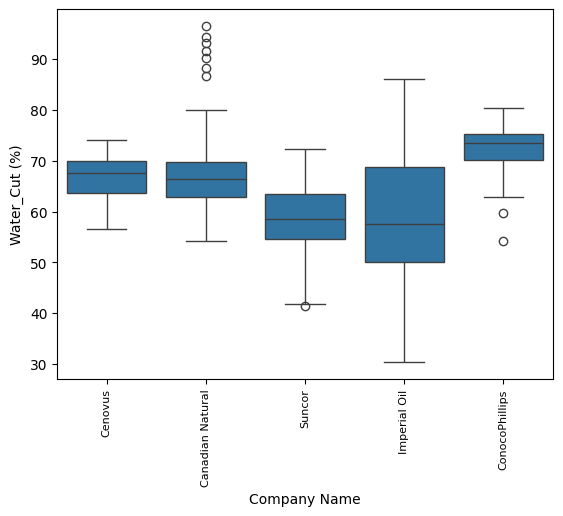

In [40]:
sns.boxplot(data=top_10_all,x='Operator',y='Water_Cut (%)')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Water_Cut (%)')
plt.xlabel('Company Name')
plt.show()

Summary of findings:

1. Most of the top 10 wells of the top 5 companies have a similar watercut content, over 65%. This suggests that the wells are not efficient overall and they all need to spend additional resources to treat the oil.

2. Suncor is the company with most efficient wells. Imperial Oil has a similar performance, but with high variance.

3. CNRL has some wells with extreme inneficiencies, with around 90%. Those wells, although with peak performance, should be investigated.

4. CNRL is the only company among the top 5 that does not recover the load fluid. It is proposed to do some additional research to improve the efficiency of the activity.

5. There does not seem to be any additional undesired byproduct in any of these wells.

In [1]:
#This is a test 

Testing of git commands